
# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Виконайте кластеризацію по ВВП на душу населення та щільності населення.
2. Використайте метод ліктя для підбору оптимальної кількості кластерів.
3. Визначіть, який регіон домінує в кожному з кластерів.
4. Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).
5. Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Виконайте кластеризацію по ВВП на душу населення та щільності населення. </p>
</div>


In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

In [6]:
#libraries importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Зчитую дані з файлу у датафрейм


In [7]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
path="clean_data2.csv"
df = pd.read_csv(path)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        217 non-null    object 
 1   Region              217 non-null    object 
 2   GDP per capita      217 non-null    float64
 3   Population          217 non-null    float64
 4   CO2 emission        217 non-null    float64
 5   Area                217 non-null    int64  
 6   Population density  217 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 12.0+ KB


Виділяю параметри для кластеризації

In [8]:
features = df[['GDP per capita', 'Population density']]
features

,GDP per capita,Population density
0,561.778746,53.083405
1,4124.982390,100.038296
2,3916.881571,17.048902
3,11834.745230,277.995000
4,36988.622030,164.427660
...,...,...
212,13445.593416,294.145714
213,2943.404534,756.074086
214,990.334774,52.245796
215,1269.573537,22.045136


Будую модель методом k середніх з кількістю кластерів 8

In [9]:
kmeans1 = KMeans(
    init='random',
    n_clusters=8,
    n_init=10,
    max_iter=300,
)

kmeans1.fit(features);

<p>Отримані центри кластерів:</p>


In [10]:
kmeans1.cluster_centers_

array([[ 4157.26769357,   115.21578909],
       [13445.59341606, 19249.5       ],
       [25288.99915571,   371.88157383],
       [70801.76889125,  2646.54657044],
       [ 8326.23642617,   223.53683258],
       [ 1159.71404938,   127.43578214],
       [43104.7268005 ,   900.26897294],
       [14017.75104224,   276.34639673]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [11]:
kmeans1.labels_

array([5, 0, 0, 7, 6, 0, 7, 7, 0, 7, 6, 6, 0, 2, 2, 5, 7, 0, 6, 0, 5, 7,
       0, 0, 0, 4, 4, 7, 2, 4, 5, 5, 0, 5, 5, 6, 7, 5, 5, 7, 7, 4, 0, 5,
       5, 5, 7, 5, 7, 7, 7, 2, 7, 6, 7, 4, 4, 0, 0, 0, 4, 7, 7, 5, 7, 0,
       6, 6, 7, 4, 5, 0, 6, 5, 7, 7, 7, 4, 6, 0, 5, 5, 0, 5, 5, 6, 7, 3,
       5, 0, 0, 0, 3, 7, 6, 2, 0, 6, 0, 4, 5, 5, 7, 2, 0, 2, 5, 5, 7, 4,
       5, 5, 7, 7, 7, 3, 3, 0, 5, 5, 4, 4, 5, 2, 0, 5, 4, 4, 0, 5, 1, 0,
       4, 0, 5, 5, 0, 4, 5, 6, 7, 6, 5, 7, 5, 2, 3, 7, 5, 7, 7, 5, 0, 0,
       0, 7, 2, 2, 3, 4, 4, 5, 0, 6, 5, 2, 5, 0, 7, 5, 6, 7, 7, 2, 5, 5,
       0, 7, 2, 0, 7, 4, 7, 4, 5, 0, 0, 6, 3, 7, 5, 5, 0, 5, 5, 0, 7, 0,
       4, 4, 7, 0, 5, 5, 6, 6, 3, 7, 5, 0, 7, 5, 7, 0, 5, 5, 5],
      dtype=int32)

<p>Візуалізую отримані кластери:</p>


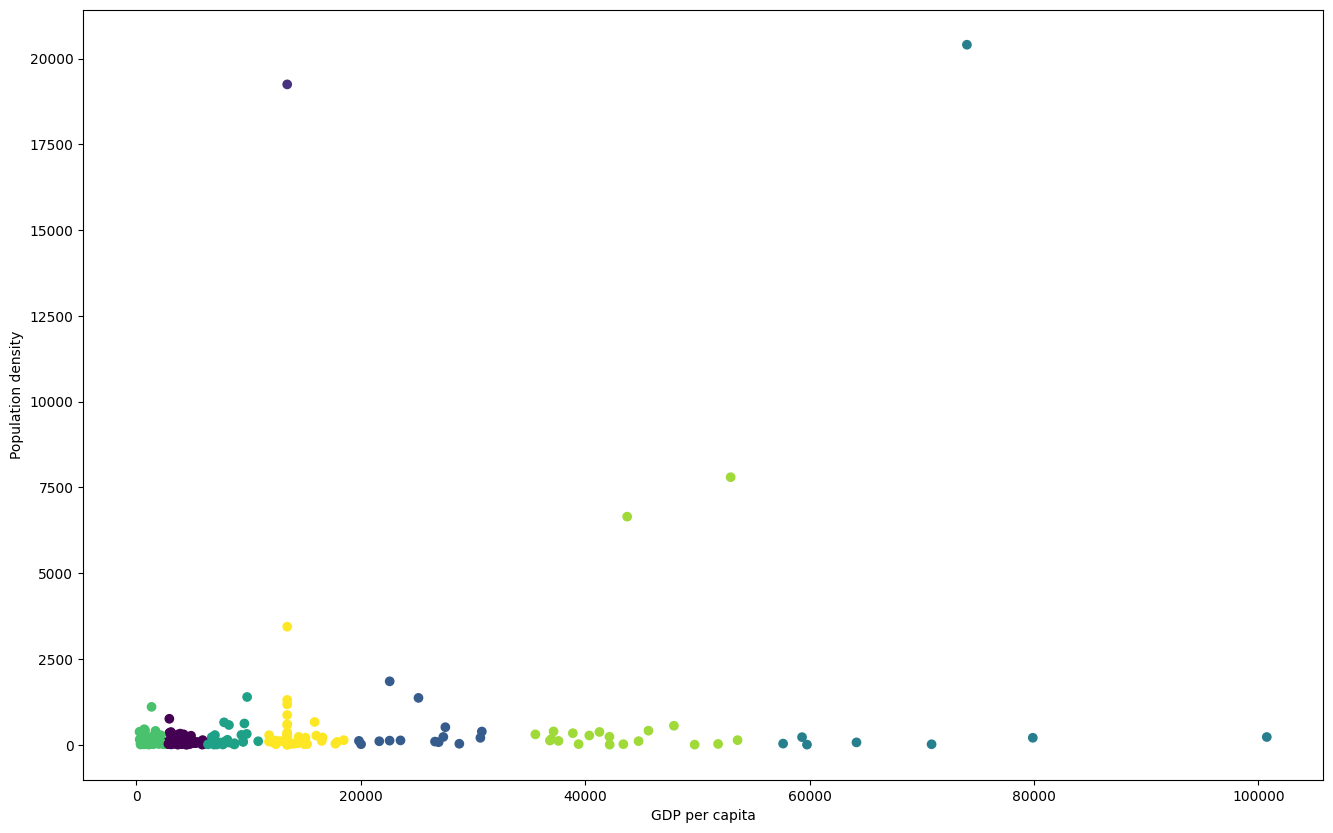

In [14]:
plt.figure(figsize=(16,10))
plt.xlabel('GDP per capita')
plt.ylabel('Population density')
plt.scatter(df[['GDP per capita']], df[['Population density']], c=kmeans1.labels_)

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Використайте метод ліктя для підбору оптимальної кількості кластерів.</p>
</div>


Визначаю оптимальну кількість кластерів. Скористаюсь методом "ліктя". Для цього ініціалізую алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі рахую суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):

In [ ]:
kmeans_kwargs={
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
max_kernels = 10
for k in range(1, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

<p>Візуалізую отримані результати:</p>


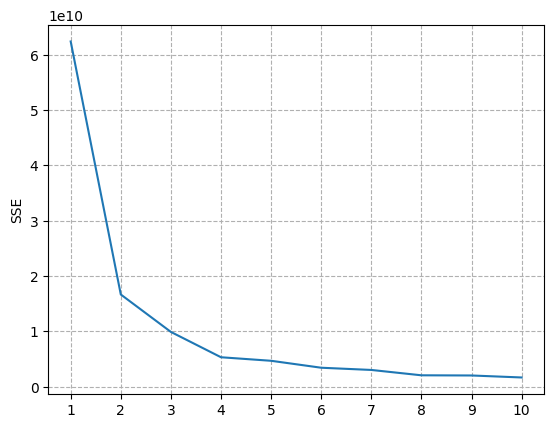

In [ ]:
plt.plot(range(1, max_kernels + 1), sse)
plt.xticks(range(1, max_kernels +1))
plt.ylabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

<p>Додатково розрахую коефіцієнти силуетів для визначення кращої кількості кластерів</p>

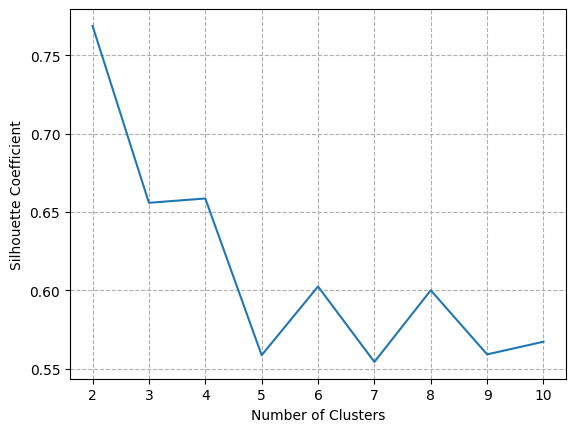

In [18]:
silhouette_coefficients = []

for k in range (2, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, max_kernels + 1), silhouette_coefficients)
plt.xticks(range(2, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(linestyle='--')
plt.show()

<p>Оптимальна кількість кластерів дорівнює 3</p>
<p>Візуалізую для оптимальної кількості кластерів:</p>

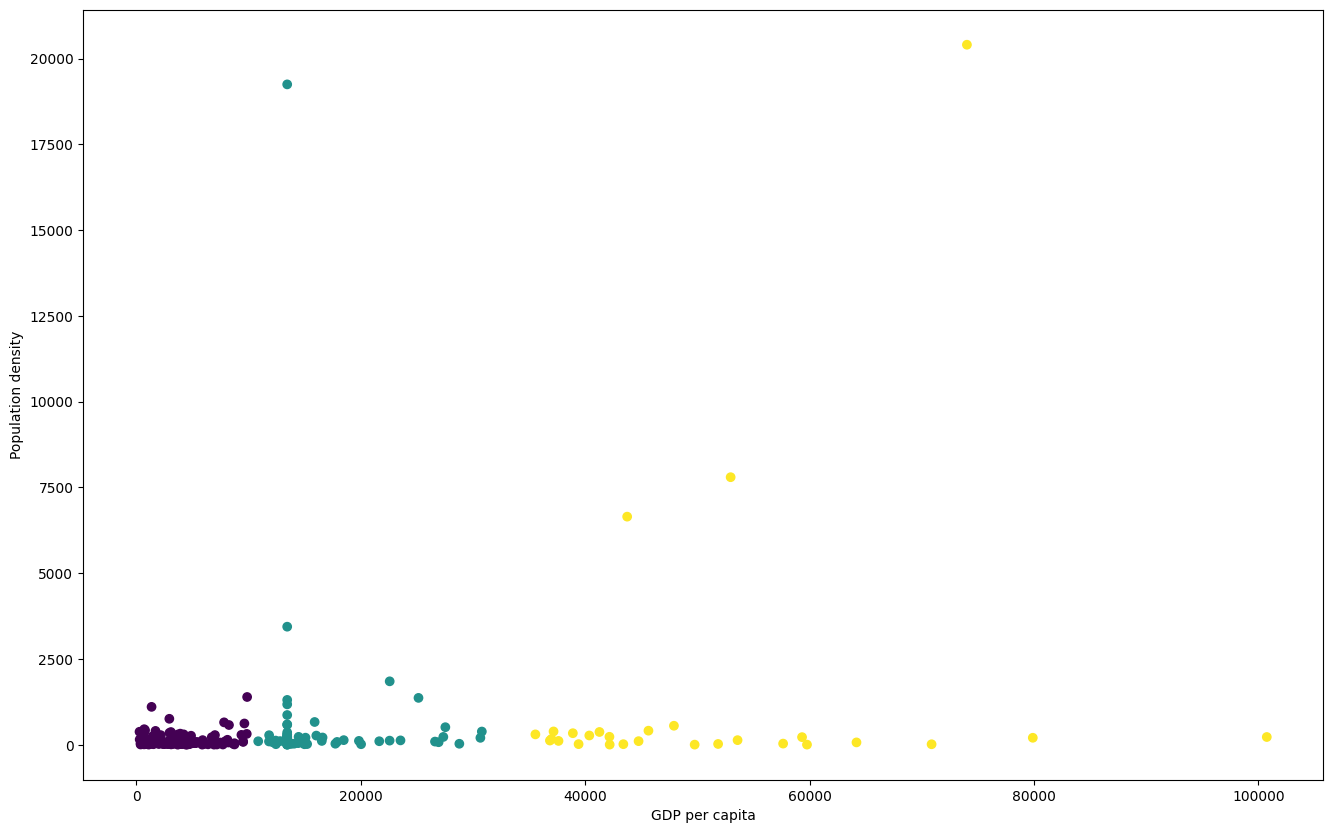

In [22]:
kmeans2 = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300
)

kmeans2.fit(features)

plt.figure(figsize=(16,10))
plt.xlabel('GDP per capita')
plt.ylabel('Population density')
plt.scatter(df[['GDP per capita']], df[['Population density']], c=kmeans2.labels_)

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Визначіть, який регіон домінує в кожному з кластерів.</p>
</div>


Додаю мітки кластерів в датафрейм

In [23]:
df['cluster'] = kmeans2.labels_

Визначаю домінуючий регіон для кожного кластера

In [24]:
dominant_region_counts = df.groupby('cluster')['Region'].value_counts().groupby('cluster').head(1)
print(dominant_region_counts)

cluster  Region               
0        Sub-Saharan Africa       44
1        Europe & Central Asia    22
2        Europe & Central Asia    16
Name: count, dtype: int64


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).</p>
</div>


 Обираю потрібні ознаки:


In [29]:
chosen_features = df[['GDP per capita', 'Population', 'CO2 emission', 'Area', 'Region']]

 Розділяю датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [30]:
df_train, df_test = train_test_split(
    chosen_features,
    test_size=0.2,
    random_state=1
)
df_train.head()

,GDP per capita,Population,CO2 emission,Area,Region
117,5237.147670,2081206.0,7510.016,25710,Europe & Central Asia
47,1534.973724,23695919.0,11045.004,322460,Sub-Saharan Africa
27,13445.593416,30661.0,179.683,150,Latin America & Caribbean
59,4223.584579,6344722.0,6285.238,21040,Latin America & Caribbean
40,13792.926050,17909754.0,82562.505,756096,Latin America & Caribbean


<p>Розміщую цільові дані - Region -  в окремому датафреймі:</p>

In [31]:
x_train = df_train.drop(columns=['Region'])
y_train = df_train['Region']

x_test = df_test.drop(columns=['Region'])
y_test = df_test['Region']

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- k-nearest neighbors;
- Decision Tree;
- Random Forest;
- AdaBoost;
- Gradient Boosting.

In [34]:
models_scores_results = []

 <h2>Метод 1. k-nearest neighbors</h2>


Будую модель


In [32]:
KNN_model = KNeighborsClassifier(n_neighbors=6)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Оцінюю точність

In [35]:
knn_score = KNN_model.score(x_test, y_test)
print('mean accuracy:', knn_score)
models_scores_results.append(('K-nearest neighbors', knn_score))

mean accuracy: 0.20454545454545456


 <h2>Метод 2. Decision Tree</h2>


Будую модель


In [37]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Оцінюю точність

In [38]:
decision_tree_score = decision_tree.score(x_test, y_test)
print('mean accuracy:', decision_tree_score)
models_scores_results.append(('Decision tree', decision_tree_score))

mean accuracy: 0.5227272727272727


 <h2>Метод 3. Random Forest</h2>


Будую модель


In [39]:
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

Оцінюю точність

In [40]:
random_forest_score = random_forest.score(x_test, y_test)
print('mean accuracy:', random_forest_score)
models_scores_results.append(('Random forest', random_forest_score))

mean accuracy: 0.5227272727272727


 <h2>Метод 4. AdaBoost</h2>


Будую модель


In [41]:
ada_boost = AdaBoostClassifier(learning_rate=0.3)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.3)

Оцінюю точність

In [43]:
ada_boost_score = ada_boost.score(x_test, y_test)
print('mean accuracy:', ada_boost_score)
models_scores_results.append(('AdaBoost', ada_boost_score))

mean accuracy: 0.5227272727272727


 <h2>Метод 5. Gradient Boosting</h2>


Будую модель


In [44]:
gradient_boosting = GradientBoostingClassifier(learning_rate=0.05)
gradient_boosting.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05)

Оцінюю точність

In [45]:
gradient_boosting_score = gradient_boosting.score(x_test, y_test)
print('mean accuracy:', gradient_boosting_score)
models_scores_results.append(("Gradient boosting", gradient_boosting_score))

mean accuracy: 0.4772727272727273


<h2>Досліджую результати</h2>

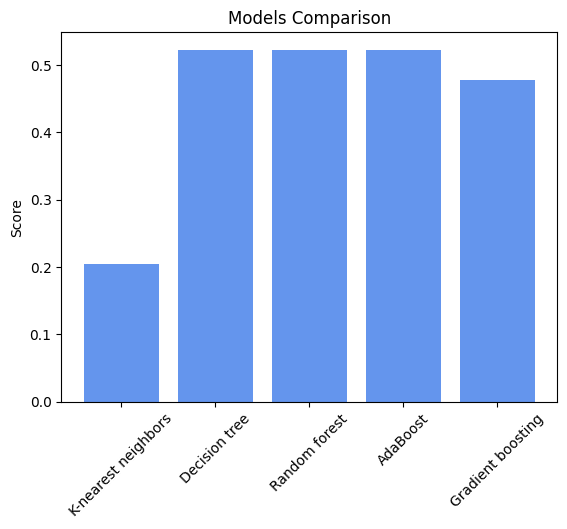

In [48]:
model_names, scores = zip(*models_scores_results)

plt.bar(model_names, scores, color='cornflowerblue')
plt.title('Models Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

<h2>Проміжні результати</h2>
<p>Моделі Decision tree, Random forest, mAdaBoost показали однаково високі результати. Щоб все ж обрати найкращу модель, перевіримо стабільність, прогнавши кожну модель через крос-валідацію і подивимось, у якої моделі найменша дисперсія</p>

In [49]:
cross_val_models_results = []

In [50]:
knn_cross_val_score = cross_val_score(KNN_model, x_train, y_train, cv=5)
cross_val_models_results.append(('KNN', knn_cross_val_score.mean(), knn_cross_val_score.std()))

decision_tree_cross_val_score = cross_val_score(decision_tree, x_train, y_train, cv=5)
cross_val_models_results.append(('Decision tree', decision_tree_cross_val_score.mean(), decision_tree_cross_val_score.std()))

random_forest_cross_val_score = cross_val_score(random_forest, x_train, y_train, cv=5)
cross_val_models_results.append(('Random forest', random_forest_cross_val_score.mean(), random_forest_cross_val_score.std()))

adaBoost_cross_val_score = cross_val_score(ada_boost, x_train, y_train, cv=5)
cross_val_models_results.append(('AdaBoost', adaBoost_cross_val_score.mean(), adaBoost_cross_val_score.std()))

gradient_boosting_cross_val_score = cross_val_score(gradient_boosting, x_train, y_train, cv=5)
cross_val_models_results.append(('Gradient Boosting', gradient_boosting_cross_val_score.mean(), gradient_boosting_cross_val_score.std()))

/Users/saszco/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/saszco/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/saszco/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/saszco/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/saszco/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, whi

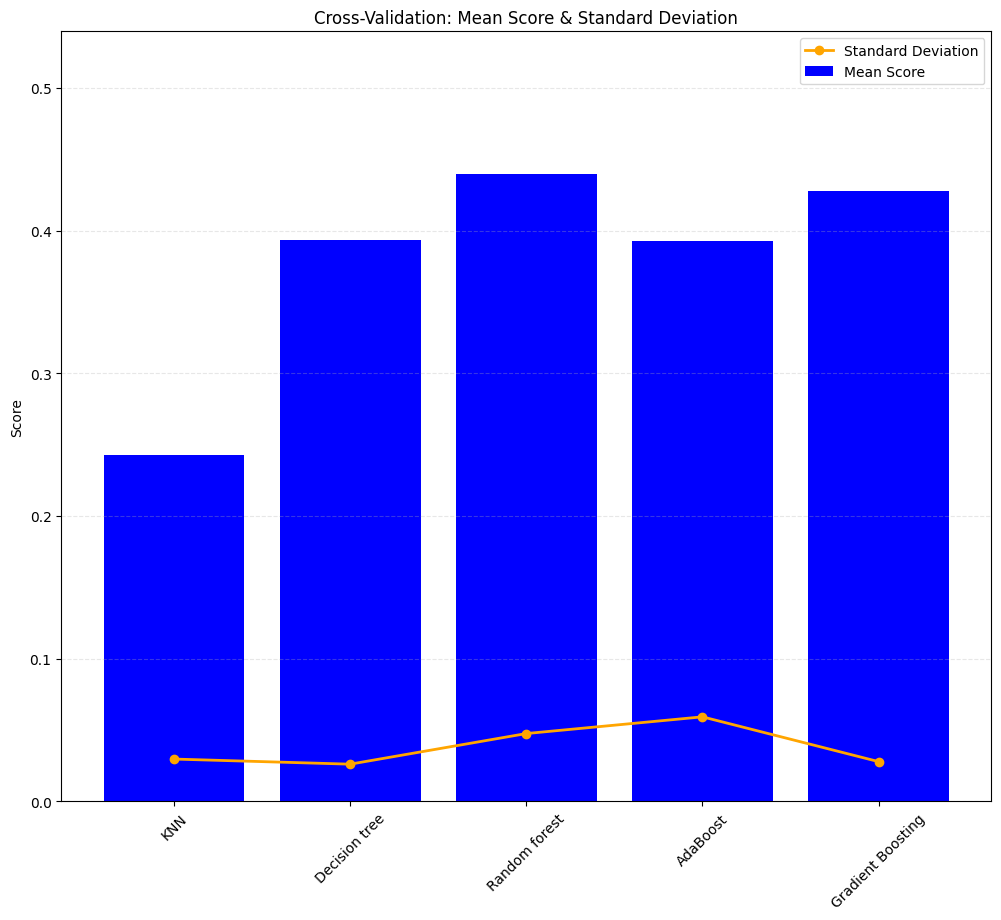

In [58]:
model_names, cross_val_means, stds = zip(*cross_val_models_results)

x = np.arange(len(model_names))

plt.figure(figsize=(12, 10))

plt.bar(x, cross_val_means, color='blue', label='Mean Score')

plt.plot(x, stds, color='orange', marker='o', linestyle='-', linewidth=2, label='Standard Deviation')

plt.xticks(x, model_names, rotation=45)
plt.ylabel('Score')
plt.title('Cross-Validation: Mean Score & Standard Deviation')
plt.ylim(0, max(max(cross_val_means), max(stds)) + 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

<h2>Висновок</h2>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель Random forest є найкращою</b> . </p>

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.</p>
</div>


<p>Скористаюсь методом "ліктя" для визначення параметра learning_rate методу Gradient Boosting </p>
<p>Для цього ініціалізую алгоритм з параметром від 0.1 до 1 і для кожної моделі порахую mean accuracy:</p>

In [64]:
accuracy = []
for i in np.arange(0, 1, 0.05):
    gradient_boosting_model = GradientBoostingClassifier(learning_rate=i)
    gradient_boosting_model.fit(x_train, y_train)
    accuracy.append(gradient_boosting_model.score(x_test, y_test))

 Отримані показники якості візуалізую на графіку:


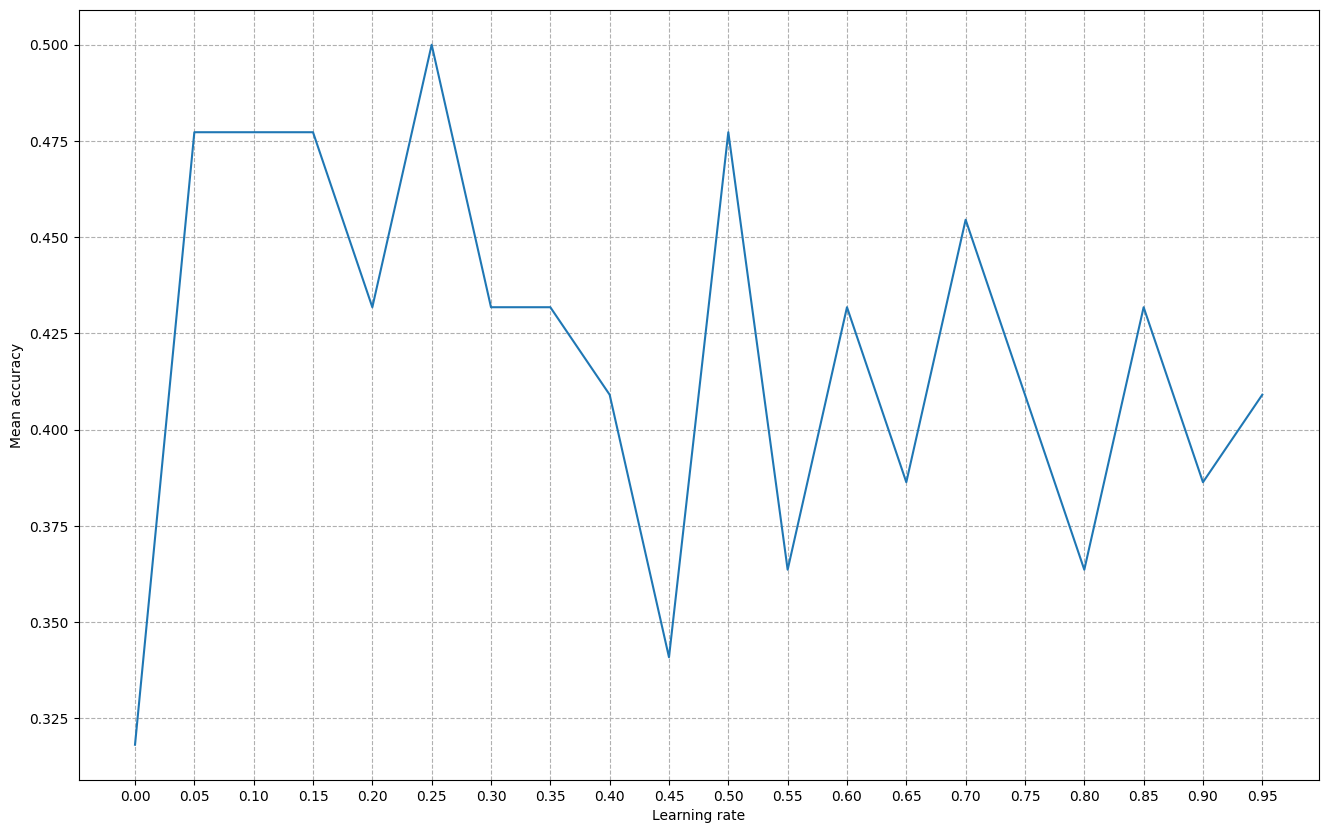

In [65]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(0, 1, 0.05), accuracy)
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('Learning rate')
plt.ylabel('Mean accuracy')
plt.grid(linestyle='--')
plt.show()

З графіку бачу, що найкраще значення параметра знаходиться в межах від 0.05 до 0.25, тому що коли learning_rate > 0,25, модель починає себе вести не стабільно, що може свідчити про перенавчання моделі. Чим більший learning rate, тим більші кроки робить модель на кожній ітерації - замість того, щоб обережно наближатись до оптимального рішення, модель може перестрибувати його або перенавчатися на шуми в даних


<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Використовуючи файл <a href="https://drive.google.com/file/d/1gxqzPQNlqrwrJI3zstMsvHQAbsdMPe-2/view?usp=drive_link" target="_blank">Data5.csv</a>:

1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.
2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1.</p>
</div>


Згідно з методологією вимірювання сталого розвитку країн, сталий розвиток оцінюється за допомогою відповідного індексу у просторі трьох вимірів: економічного (Іес), екологічного (Іе) і соціально-інституціонального (Is). Цей індекс є вектором, норма якого визначає рівень сталого розвитку, а його просторове положення в системі координат (Iec,Ie,Is) характеризує міру «гармонійності» цього розвитку.

<details><summary>Натисніть тут, щоб побачити підказку до першого завдання</summary>

```python
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df

```

</details>



In [108]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

In [109]:
df.head()
df.columns

Index(['Country', 'ISO', 'UA', 'Cql', 'Ie', 'Iec', 'Is'], dtype='object')

In [110]:
features = df[['Ie', 'Iec', 'Is']]
features

,Ie,Iec,Is
0,0.605348,0.538673,0.510113
1,0.587219,0.348159,0.497986
2,0.274394,0.332117,0.346907
3,0.699685,0.281995,0.518820
4,0.718327,0.535648,0.486498
...,...,...,...
127,0.612819,0.568067,0.648819
128,0.670452,0.249923,0.367244
129,0.371843,0.393854,0.423359
130,0.244049,0.357660,0.330743


In [111]:
kmeans3 = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans3.fit(features)

KMeans(init='random', n_clusters=4, n_init=10)

<p>Отримані центри кластерів</p>

In [112]:
kmeans3.cluster_centers_

array([[0.43954772, 0.44454091, 0.48122666],
       [0.63202815, 0.46605385, 0.48903674],
       [0.74939043, 0.64069787, 0.62167812],
       [0.24559709, 0.38690253, 0.39407509]])

/var/folders/gj/d30kkjdn37n1x7z794t6qtm00000gn/T/ipykernel_15055/4035486306.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


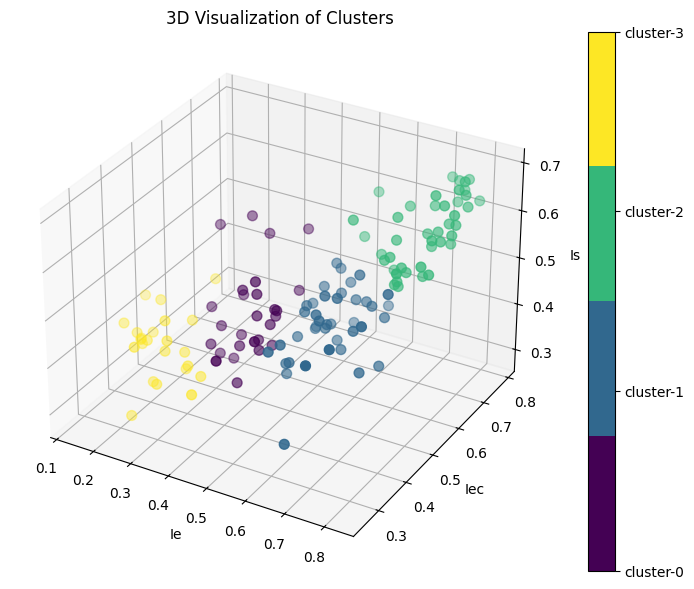

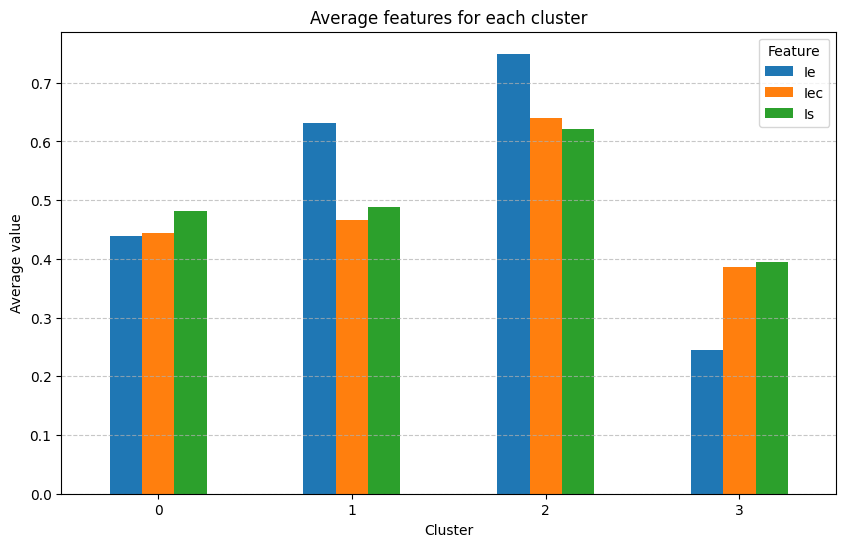

In [113]:
labels = kmeans3.labels_
n_clusters = len(np.unique(labels))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.cm.get_cmap('viridis', n_clusters)

scatter = ax.scatter(
    df['Ie'], df['Iec'], df['Is'],
    c=labels, cmap=cmap, s=50
)

ax.set_xlabel('Ie')
ax.set_ylabel('Iec')
ax.set_zlabel('Is')

cbar = plt.colorbar(scatter, ticks=range(n_clusters))
cbar.ax.set_yticklabels([f'cluster-{i}' for i in range(n_clusters)])

plt.title('3D Visualization of Clusters')
plt.show()

df['cluster'] = labels
cluster_summary = df.groupby('cluster')[['Ie', 'Iec', 'Is']].mean()

cluster_summary.plot(kind='bar', figsize=(10,6))
plt.title('Average features for each cluster')
plt.ylabel('Average value')
plt.xlabel('Cluster')
plt.legend(title='Feature')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Кластер #2 містить країни з найвищим рівнем розвитку

<details><summary>Натисніть тут, щоб побачити підказку до другого завдання</summary>

Номери кластерів для першого і другого методів кластеризації зовсім не обовязково співпадатимуть. Щоб знайти відповідність, подивіться в які кластери з другого методу потрапляють центри кластерів з першого.

Порахувати скільки країн потрапило в різні кластери можна з використанням матриці невідповідностей (як аргументи поставти номери кластерів для першого і другого методів кластеризації).

</details>

In [114]:
kmeans_Cql = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

kmeans_Cql.fit(df[['Cql']])

KMeans(init='random', n_clusters=4, n_init=10)

In [115]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df['cluster_features'] = kmeans3.labels_
df['cluster_Cql'] = kmeans_Cql.labels_

In [116]:
comparison_table = pd.crosstab(df['cluster_features'], df['cluster_Cql'])
print(comparison_table)

cluster_Cql        0   1   2   3
cluster_features                
0                  4   6  17   0
1                 18   0  22   0
2                 13   0   0  29
3                  0  22   1   0


<h2>Виконав студент групи ІП-33 <br> Корольчук Олександр</h2>
